## Import Libraries

In [26]:
import pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Database Connection

In [27]:
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='1218',
    database='sales_analysis'
)

print("Connected!")

Connected!


## Data Overview

In [29]:
cursor = connection.cursor()

query = '''select * from sales_data'''

cursor.execute(query)

cursor.description

columns = [desc[0] for desc in cursor.description]

results = cursor.fetchall()
data = pd.DataFrame(results, columns=columns)
data.head(5)

,order_id,product_category,sales_amount,profit,customer_age,purchase_date,region,rating
0,1,Electronics,479,168,58,2023-01-01,East,1.6
1,2,Electronics,213,170,27,2023-01-02,South,2.7
2,3,Clothing,841,70,33,2023-01-03,West,2.6
3,4,Electronics,1959,334,29,2023-01-04,East,1.1
4,5,Books,427,48,31,2023-01-05,South,4.9


## Total sales by product category

In [30]:
cursor = connection.cursor()

query = 'select product_category, sum(sales_amount) as total_sales from sales_data group by product_category'

cursor.execute(query)

cursor.description

columns = [desc[0] for desc in cursor.description]

results = cursor.fetchall()
total_sales_category = pd.DataFrame(results, columns=columns)
total_sales_category

,product_category,total_sales
0,Electronics,16227
1,Clothing,12047
2,Books,23868
3,Home,37949
4,Sports,12140


## Monthly sales trend

In [31]:
cursor = connection.cursor()

query = '''select monthname(purchase_date) as months, sum(sales_amount) as total_sales
from sales_data group by monthname(purchase_date)'''

cursor.execute(query)

cursor.description

columns = [desc[0] for desc in cursor.description]

results = cursor.fetchall()
monthly_sales = pd.DataFrame(results, columns=columns)
monthly_sales

,months,total_sales
0,January,32874
1,February,27406
2,March,29638
3,April,12313


## Top 5 Most Profitable Products

In [32]:
cursor = connection.cursor()

query = '''select order_id, product_category, profit, sales_amount
from sales_data order by profit desc limit 5'''

cursor.execute(query)

cursor.description

columns = [desc[0] for desc in cursor.description]

results = cursor.fetchall()
top_profitable = pd.DataFrame(results, columns=columns)
top_profitable

,order_id,product_category,profit,sales_amount
0,8,Electronics,498,755
1,67,Clothing,488,142
2,64,Books,485,692
3,55,Sports,476,63
4,57,Home,475,1184


## Customer age distribution

In [33]:
age_stats = data["customer_age"].describe()
print(age_stats)

count    100.000000
mean      41.650000
std       14.811526
min       18.000000
25%       29.000000
50%       39.500000
75%       55.000000
max       69.000000
Name: customer_age, dtype: float64


## Best Performing Region by Sales

In [34]:
cursor = connection.cursor()

query = '''select region, sum(sales_amount) as total_sales from sales_data group by region'''

cursor.execute(query)

cursor.description

columns = [desc[0] for desc in cursor.description]

results = cursor.fetchall()
region_sales = pd.DataFrame(results, columns=columns)
region_sales

,region,total_sales
0,East,28743
1,South,25045
2,West,21606
3,North,26837


## Correlation Between Sales, Profit, and Rating

In [35]:
correlation_matrix = data[['sales_amount', 'profit', 'rating']].corr()
print(correlation_matrix)

              sales_amount    profit    rating
sales_amount      1.000000 -0.032848  0.024372
profit           -0.032848  1.000000  0.198977
rating            0.024372  0.198977  1.000000


## Total sales by product category Visualization

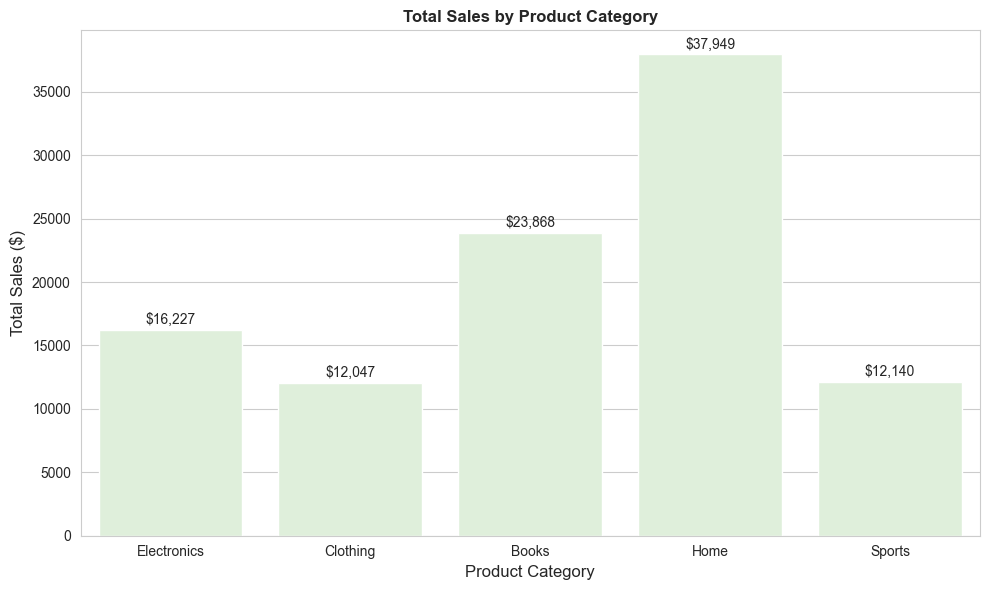

In [36]:
sns.set_style(style="whitegrid")
sns.set_palette("GnBu")
plt.figure(figsize=(10, 6))

ax = sns.barplot(data=total_sales_category, x="product_category", y="total_sales",
                 estimator="sum", errorbar=None)

plt.title("Total Sales by Product Category", fontweight='bold')
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f'${x:,.0f}', padding=2)

plt.tight_layout()
plt.savefig("visualization/sales_by_category_seaborn.png", dpi=300, bbox_inches='tight')
plt.show()

## Monthly Sales Trend Visualization

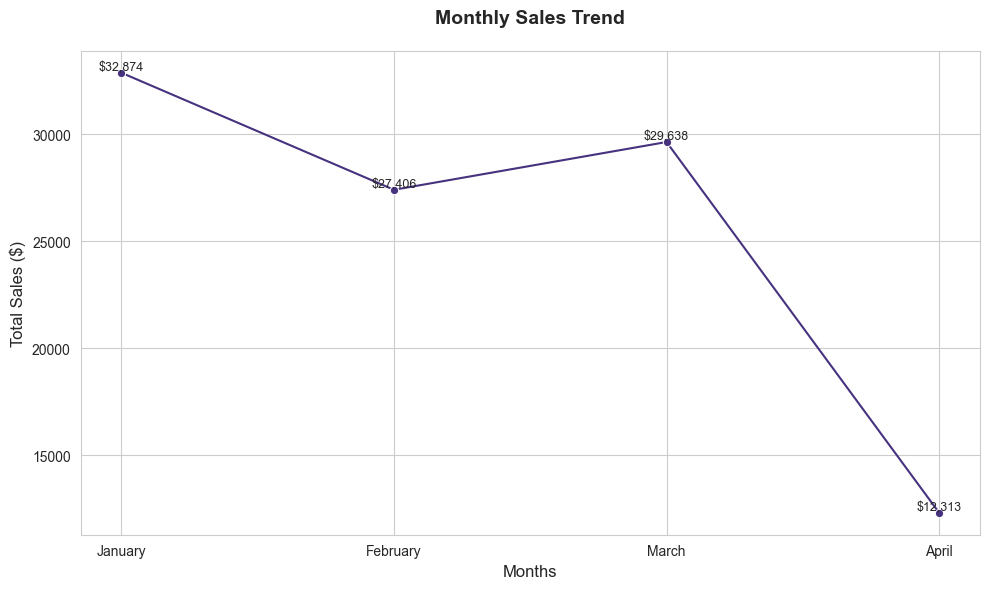

In [37]:
sns.set_style(style="whitegrid")
sns.set_palette("viridis")
plt.figure(figsize=(10, 6))

sns.lineplot(data=monthly_sales, x="months", y="total_sales",
            estimator="sum", marker="o")
plt.title("Monthly Sales Trend", fontsize=14, fontweight='bold', pad=20)
plt.xlabel("Months", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)

monthly_totals = monthly_sales.groupby("months")["total_sales"].sum()
months = monthly_totals.index.tolist()
sales = monthly_totals.values.tolist()

for month, sale in zip(months, sales):
    plt.text(month, sale, f'${sale:,.0f}', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig("visualization/monthly_sales_trend_seaborn.png", dpi=300, bbox_inches='tight')
plt.show()

## Top 5 Most Profitable Products Visualization

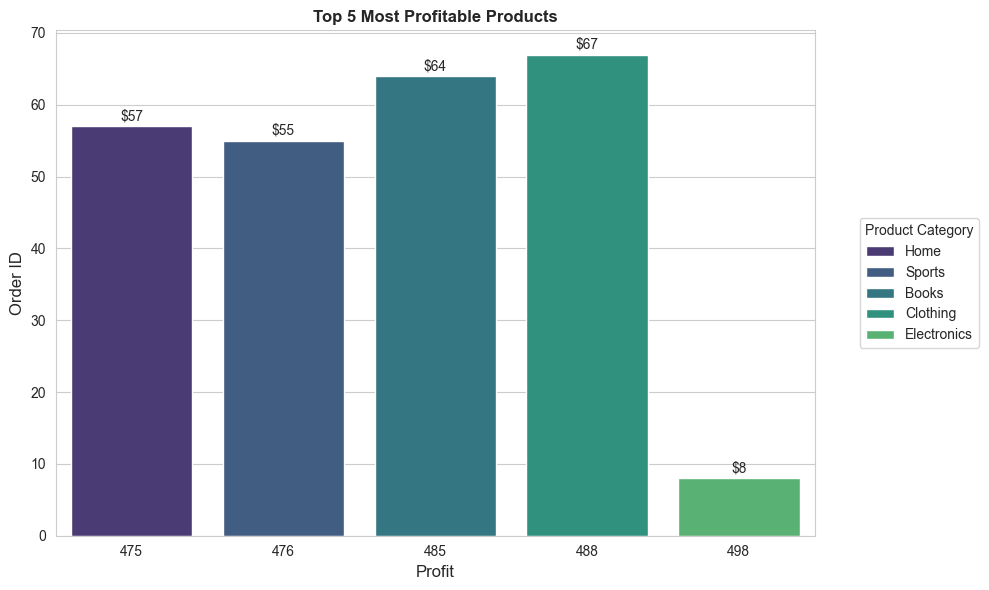

In [38]:
sns.set_style(style="whitegrid")
sns.set_palette("viridis")
plt.figure(figsize=(10, 6))

ax = sns.barplot(data=top_profitable, x="profit", y="order_id",
                hue="product_category", errorbar=None)

plt.title("Top 5 Most Profitable Products", fontweight='bold')
plt.xlabel("Profit", fontsize=12)
plt.ylabel("Order ID", fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f'${x:,.0f}', padding=2)

plt.legend(title='Product Category',
           bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.tight_layout()
plt.savefig("visualization/top_5_profitable_product_seaborn.png", dpi=300, bbox_inches='tight')
plt.show()

## Age Distribution Visualization

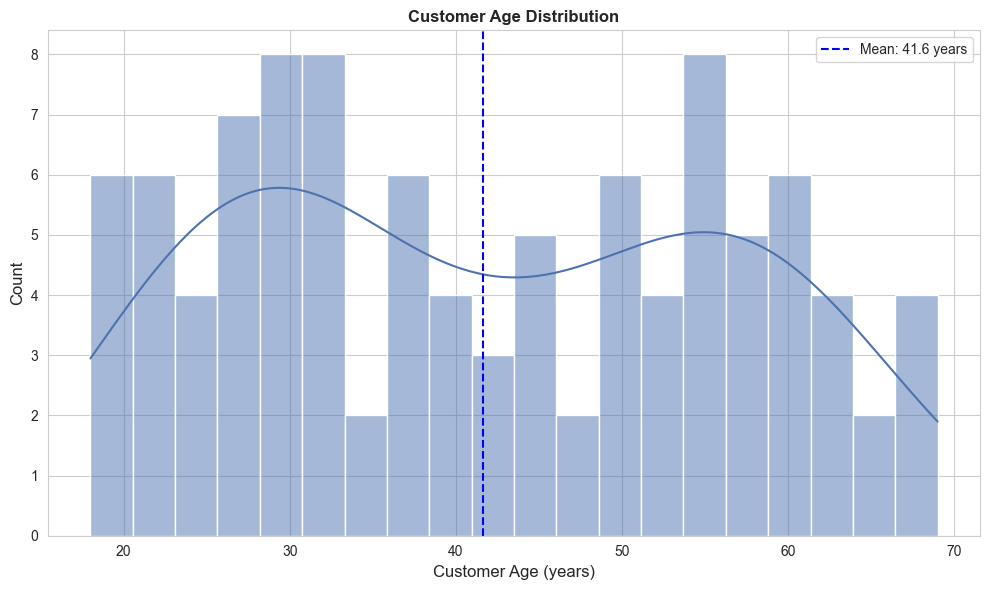

In [39]:
sns.set_style(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.histplot(data=data, x="customer_age",
            bins=20, kde=True, color="#4C72B0")

mean_age = data["customer_age"].mean()
plt.axvline(x=mean_age, color='blue', linestyle='--',
            label=f'Mean: {mean_age:.1f} years')

plt.title("Customer Age Distribution", fontweight='bold')
plt.xlabel("Customer Age (years)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend()

plt.tight_layout()
plt.savefig("visualization/age_distribution_seaborn.png", dpi=300, bbox_inches='tight')
plt.show()

## Best Performing Region by Sales Visualization

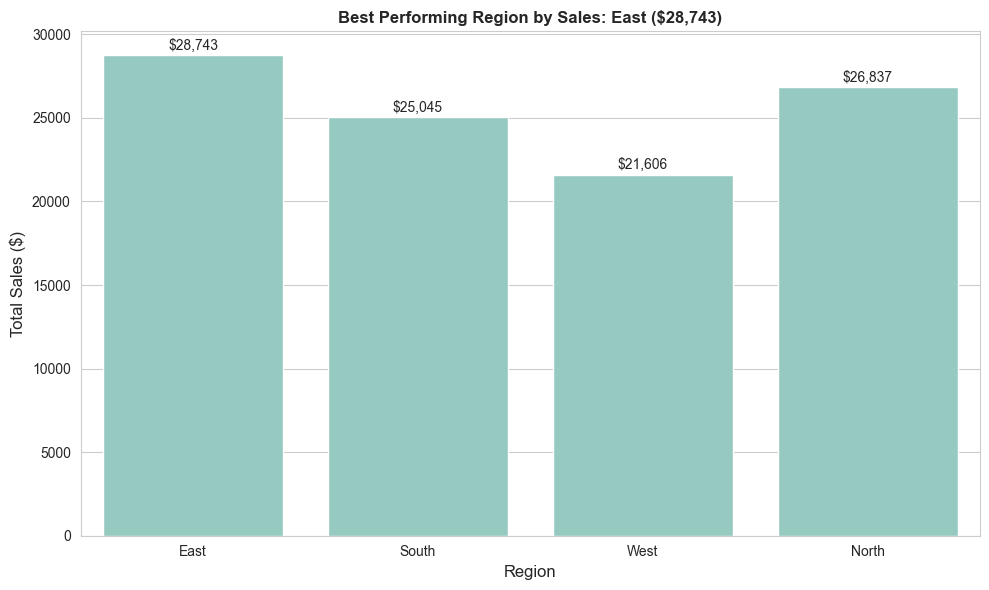

In [40]:
best_region = data.groupby("region")["sales_amount"].sum().idxmax()
best_value = data.groupby("region")["sales_amount"].sum().max()

sns.set_style(style="whitegrid")
sns.set_palette("Set3")
plt.figure(figsize=(10, 6))

ax = sns.barplot(data=region_sales, x="region", y="total_sales",
                estimator="sum", errorbar=None)

plt.title(f"Best Performing Region by Sales: {best_region} (${best_value:,.0f})",
          fontweight='bold')
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f'${x:,.0f}', padding=2)

plt.tight_layout()
plt.savefig("visualization/sales_by_region_seaborn.png", dpi=300, bbox_inches='tight')
plt.show()

## Correlation Analysis Visualization

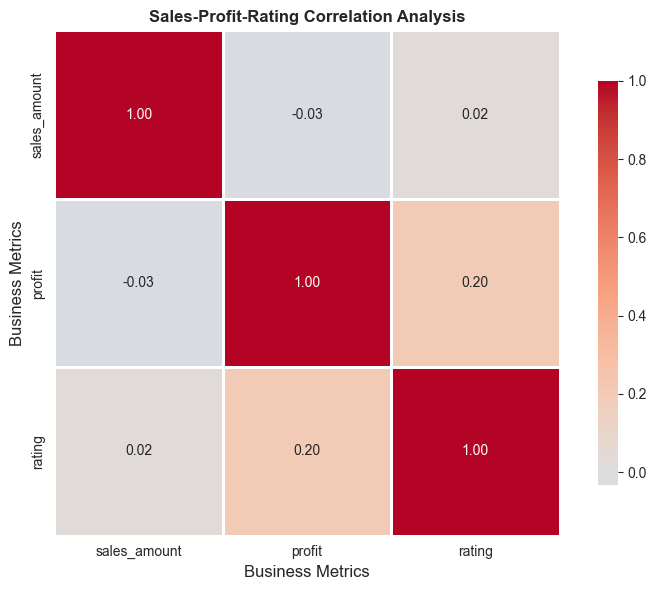

In [41]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

correlation_matrix = data[['sales_amount', 'profit', 'rating']].corr()
 
sns.heatmap(correlation_matrix,
            annot=True,
            linewidths=2,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': 0.8})

plt.title("Sales-Profit-Rating Correlation Analysis", fontweight='bold')
plt.xlabel("Business Metrics", fontsize=12)
plt.ylabel("Business Metrics", fontsize=12)

plt.tight_layout()
plt.savefig("visualization/correlation_analysis_seaborn.png", dpi=300, bbox_inches='tight')
plt.show()